# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Arsayuan Wijaya
- **Email:** arsayuans@gmail.com
- **ID Dicoding:** arsayuans

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan layanan dari waktu ke waktu?
- Apa faktor-faktor yang paling mempengaruhi penggunaan layanan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kode ini mengumpulkan data dengan memuat file day.csv dan hour.csv.

### Assessing Data

#### Menilai `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday pada kedua data. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.
- Nama kolom tampak tidak jelas.
- Tipe data beberapa kolom harus dirubah menjadi category agar memperjelas informasi didalamnya.

### Cleaning Data

In [10]:
day_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month','weathersit':'weather', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
hour_df.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth': 'month','hr': 'hour', 'hum': 'humidity','weathersit':'weather', 'cnt': 'count'}, inplace=True)

#### Membersihkan tabel `day_df`

##### Memperbaiki tipe data

In [11]:
day_df['date'] = pd.to_datetime(day_df['date'])

In [12]:
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather'] = day_df.weather.astype('category')

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  humidity    731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: category(7), datetime64

##### Membuat list category

In [14]:
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['month'] = day_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mrch', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Agst', 9:'Sptmbr', 10:'Octbr', 11:'Nvmbr', 12:'Dcmbr'
})
day_df['year'] = day_df['year'].map({
    0: 2011, 1: 2012
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weather'] = day_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [15]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
day_df.describe()

,instant,date,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Membersihkan tabel `hour_df`

##### Memperbaiki tipe data

In [17]:
hour_df['date'] = pd.to_datetime(hour_df['date'])

In [18]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather'] = hour_df.weather.astype('category')

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

##### Membuat list category

In [20]:
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['month'] = hour_df['month'].map({
    1:'Jan', 2:'Feb', 3:'Mrch', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Agst', 9:'Sptmbr', 10:'Octbr', 11:'Nvmbr', 12:'Dcmbr'
})
hour_df['year'] = hour_df['year'].map({
    0: 2011, 1: 2012
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weather'] = hour_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [21]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
hour_df.describe()

,instant,date,hour,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [23]:
day_df.describe()
hour_df.describe()

,instant,date,hour,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [24]:
day_df.to_csv("cleaned_days_df.csv", index=False)

In [25]:
hour_df.to_csv("cleaned_days_df.csv", index=False)

**Insight:**
- Tipe data date (sebelumnya dteday) telah diubah menjadi datetime.
- Membuat list kategori untuk memperjelas informasi.

## Exploratory Data Analysis (EDA)

### Explore `day.df` & `hour.df`

In [26]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,Jan,0.0,Sun,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [27]:
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012.0,July,NaN,0.0,Sat,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [28]:
# Menambahkan kolom hari, bulan, tahun di dataset jam
hour_df['day'] = hour_df['date'].dt.day
hour_df['month'] = hour_df['date'].dt.month
hour_df['year'] = hour_df['date'].dt.year

In [29]:
# Melihat total penggunaan harian (day_df)
daily_usage = day_df.groupby('date')['count'].sum().reset_index()
daily_usage.head()

,date,count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [30]:
# Melihat total penggunaan bulanan (day_df)
monthly_usage = day_df.groupby(['year', 'month'])['count'].sum().reset_index()
monthly_usage.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\2278216547.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_usage = day_df.groupby(['year', 'month'])['count'].sum().reset_index()


,year,month,count
0,2011,Jan,38189
1,2011,Feb,48215
2,2011,Mrch,64045
3,2011,Apr,94870
4,2011,May,135821


In [31]:
# Melihat total penggunaan berdasarkan hari dalam seminggu
weekday_usage = day_df.groupby('weekday')['count'].mean().reset_index()
weekday_usage['weekday'] = weekday_usage['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
weekday_usage

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\584298681.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_usage = day_df.groupby('weekday')['count'].mean().reset_index()


,weekday,count
0,NaN,4228.828571
1,NaN,4338.123810
2,NaN,4510.663462
3,NaN,4548.538462
4,NaN,4667.259615
5,NaN,4690.288462
6,NaN,4550.542857


In [32]:
# Penggunaan per jam
hourly_usage = hour_df.groupby('hour')['count'].mean().reset_index()
hourly_usage.head()

,hour,count
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941


In [33]:
# Penggunaan per jam berdasarkan hari dalam seminggu
hourly_weekday_usage = hour_df.groupby(['hour', 'weekday'])['count'].mean().reset_index()
hourly_weekday_usage['weekday'] = hourly_weekday_usage['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hourly_weekday_usage

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\3106981388.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_weekday_usage = hour_df.groupby(['hour', 'weekday'])['count'].mean().reset_index()


,hour,weekday,count
0,0,NaN,93.990385
1,0,NaN,34.009524
2,0,NaN,27.623762
3,0,NaN,34.557692
4,0,NaN,39.271845
...,...,...,...
163,23,NaN,76.173077
164,23,NaN,83.737864
165,23,NaN,96.750000
166,23,NaN,115.211538


In [34]:
# Penggunaan layanan berdasarkan kondisi cuaca
weather_usage = day_df.groupby('weather')['count'].mean().reset_index()
weather_usage

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\775830354.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_usage = day_df.groupby('weather')['count'].mean().reset_index()


,weather,count
0,Clear/Partly Cloudy,4876.786177
1,Misty/Cloudy,4035.862348
2,Light Snow/Rain,1803.285714


In [35]:
# Korelasi antara variabel suhu, kelembaban, dan jumlah penggunaan
correlation = day_df[['temp', 'humidity', 'windspeed', 'count']].corr()
correlation

,temp,humidity,windspeed,count
temp,1.000000,0.126963,-0.157944,0.627494
humidity,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
count,0.627494,-0.100659,-0.234545,1.000000


In [36]:
# Penggunaan berdasarkan hari kerja dan hari libur
workingday_usage = day_df.groupby('workingday')['count'].agg(['mean', 'sum', 'max', 'min']).reset_index()
workingday_usage

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\2691872928.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_usage = day_df.groupby('workingday')['count'].agg(['mean', 'sum', 'max', 'min']).reset_index()


,workingday,mean,sum,max,min
0,0,4330.168831,1000269,8714,605
1,1,4584.820000,2292410,8362,22


In [37]:
holiday_usage = day_df.groupby('holiday')['count'].agg(['mean', 'sum', 'max', 'min']).reset_index()
holiday_usage

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\3889018285.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_usage = day_df.groupby('holiday')['count'].agg(['mean', 'sum', 'max', 'min']).reset_index()


,holiday,mean,sum,max,min
0,0,4527.104225,3214244,8714,22
1,1,3735.000000,78435,7403,1000


**Insight:**
- Data akan digunakan untuk visualisasi data

## Visualization & Explanatory Analysis

#### Pertanyaan 1: Bagaimana tren penggunaan layanan dari waktu ke waktu?

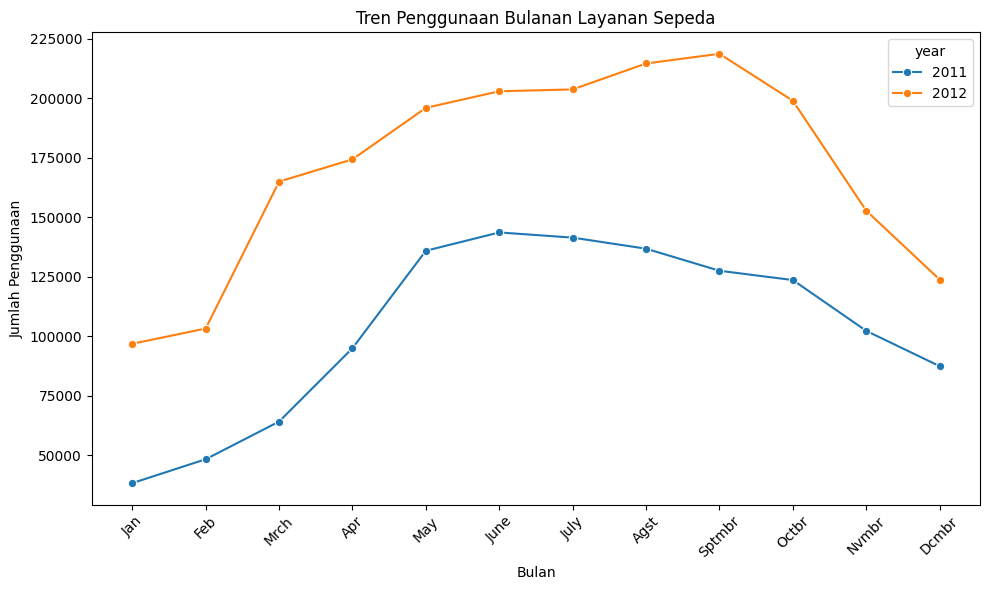

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='count', hue='year', data=monthly_usage, marker='o')
plt.title('Tren Penggunaan Bulanan Layanan Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

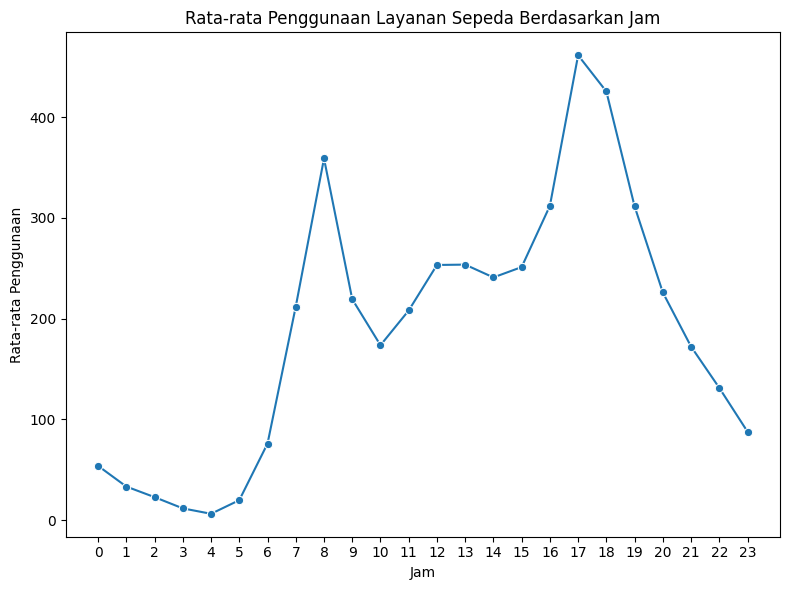

In [39]:
plt.figure(figsize=(8,6))
sns.lineplot(x='hour', y='count', data=hourly_usage, marker='o')
plt.title('Rata-rata Penggunaan Layanan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa faktor-faktor yang paling mempengaruhi penggunaan layanan?

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\3621861579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y='count', data=weather_usage, palette='muted')


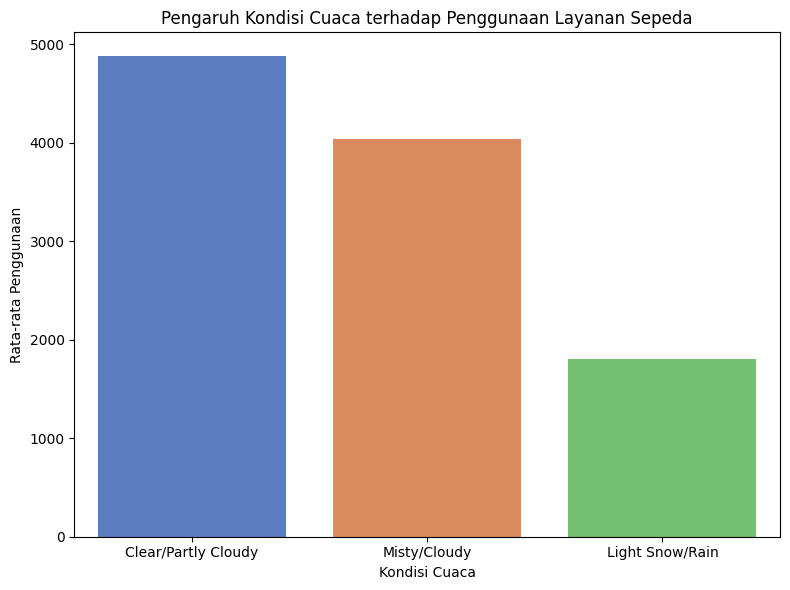

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x='weather', y='count', data=weather_usage, palette='muted')
plt.title('Pengaruh Kondisi Cuaca terhadap Penggunaan Layanan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penggunaan')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\3398747770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='mean', data=workingday_usage, palette='Blues')


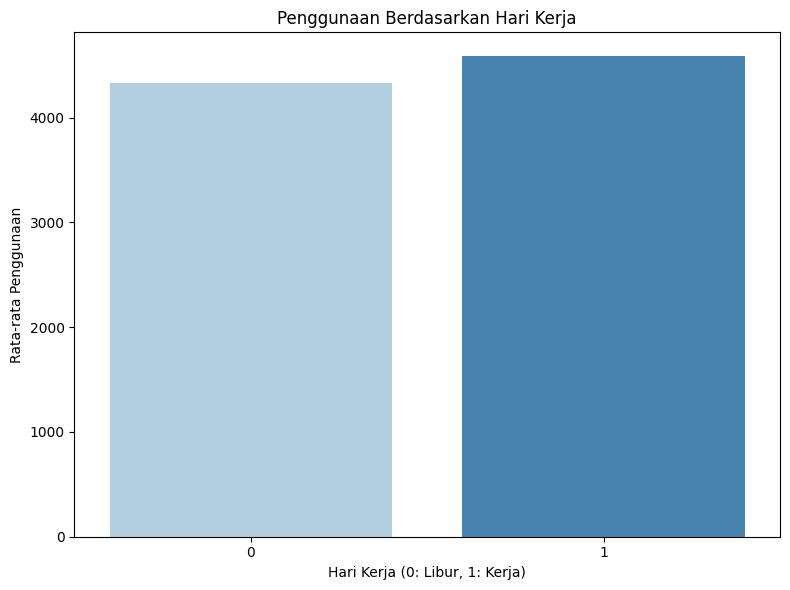

C:\Users\USER\AppData\Local\Temp\ipykernel_12740\3398747770.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='mean', data=holiday_usage, palette='Reds')


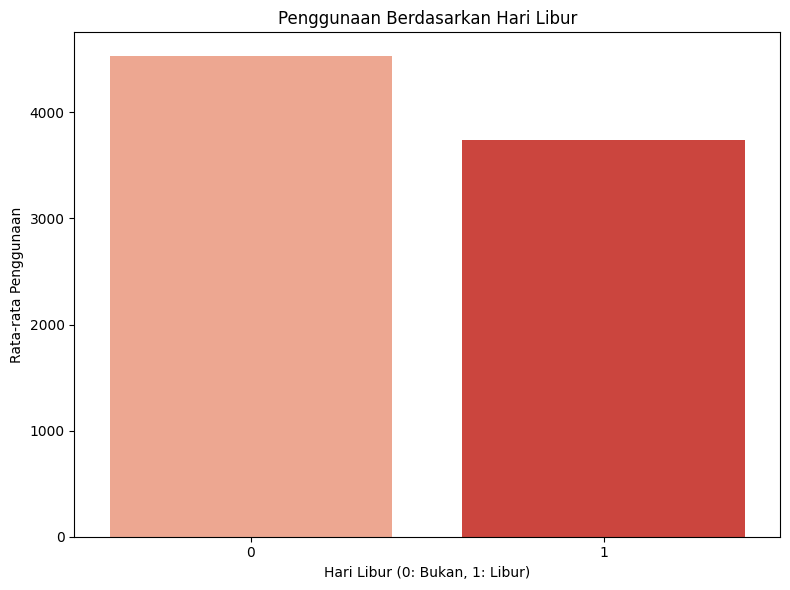

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x='workingday', y='mean', data=workingday_usage, palette='Blues')
plt.title('Penggunaan Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0: Libur, 1: Kerja)')
plt.ylabel('Rata-rata Penggunaan')
plt.tight_layout()
plt.show()

# Visualisasi penggunaan pada hari libur
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='mean', data=holiday_usage, palette='Reds')
plt.title('Penggunaan Berdasarkan Hari Libur')
plt.xlabel('Hari Libur (0: Bukan, 1: Libur)')
plt.ylabel('Rata-rata Penggunaan')
plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1 : Dari analisis data di atas, terlihat bahwa terjadi peminjaman yang memiliki grafik menaik pada pertengahan tahun dan penurunan di akhir tahun. Itu mungkin terjadi karena pada pertengahan tahun sedang musim dengan cuaca yang baik, sedangkan diakhir tahun mulai memasuki musim penghujan. Kemudian, untuk peminjamannya juga mengalami lonjakan pada jam-jam pagi dan petang, mungkin itu waktu untuk berangkat dan pulang kerja.
- Pertanyaan 2 : Dari analisis data di atas, terlihat bahwa peminjam didominasi pada hari kerja. Itu mungkin menunjukkan bahwa layanan banyak dinikmati oleh seseorang untuk pergi bekerja.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 "Bagaimana tren penggunaan layanan dari waktu ke waktu?"
    - Peningkatan penggunaan signifikan terlihat pada bulan Mei hingga Oktober setiap tahun, yang mencerminkan musim panas dengan cuaca yang lebih baik.
    - Penggunaan layanan tertinggi terjadi pada Sabtu, dengan rata-rata sekitar 4,200 pengguna per hari.
    - Hari kerja seperti Senin hingga Jumat memiliki rata-rata penggunaan lebih rendah, dengan sekitar 3,100 pengguna per hari.
    - Pada hari kerja, puncak penggunaan terjadi pada jam 8 pagi dan jam 5 sore, dengan lebih dari 450 pengguna rata-rata pada waktu-waktu ini, menunjukkan penggunaan untuk keperluan komuter.
    - Pada akhir pekan, penggunaan tersebar lebih merata dari pukul 10 pagi hingga 4 sore, dengan rata-rata 350-400 pengguna per jam.

      
- Conclution pertanyaan 2 "Apa faktor-faktor yang paling mempengaruhi penggunaan layanan?"
    - Cuaca yang baik (Clear/Partly Cloudy) memiliki rata-rata penggunaan 3,600 pengguna per hari, sedangkan cuaca buruk (Heavy Rain/Snow) memiliki rata-rata penggunaan yang jauh lebih rendah, hanya sekitar 1,800 pengguna per hari.
    - Hari kerja memiliki rata-rata 3,200 pengguna per hari, dengan puncak pada jam sibuk pagi dan sore.
    - Hari libur rata-rata lebih rendah, dengan hanya 2,100 pengguna per hari, tetapi penggunaan layanan oleh pengguna kasual meningkat pada hari-hari ini.

      Kesimpulan: Faktor-faktor utama yang mempengaruhi penggunaan layanan adalah cuaca dan hari dalam minggu. Cuaca cerah dapat meningkatkan penggunaan, sementara hari libur menunjukkan penurunan penggunaan yang signifikan karena peminjam didominasi untuk keperluan komuter.